In [1]:
!pip install --upgrade category_encoders

In [2]:
%pip install cufflinks
%pip install chart-studio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/pkgutil.py:92: MatplotlibDeprecationWarning:


The matplotlib.compat module was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



IPython             bdb                 jsonschema          runpy
PIL                 binascii            jupyter             sched
__future__          binhex              jupyter_client      scipy
_argon2_cffi_bindings bisect              jupyter_core        seaborn
_ast                bleach              jupyter_server      secrets
_asyncio            builtins            jupyterlab          select
_bisect             bz2                 jupyterlab_plotly   selectors
_blake2             cProfile            jupyterlab_pygments send2trash
_bootlocale         calendar            jupyterlab_server   setuptools
_bz2                category_encoders   jupyterlab_widgets  shelve
_cffi_backend       certifi             keyword             shlex
_codecs             cffi                kiwisolver          shutil
_codecs_cn          cgi                 lib2to3             signal
_codecs_hk          cgitb               linecache           site
_codecs_iso2022     charset_normalizer  locale       

/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/pkgutil.py:107: VisibleDeprecationWarning:

zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    



In [4]:
!pip install statsmodels

In [5]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git

  Cloning git://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-n7jvx0v9
  Running command git clone --filter=blob:none -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-n7jvx0v9
  fatal: unable to connect to github.com:
  github.com[0: 20.201.28.151]: errno=Connection refused

ERROR: Command errored out with exit status 128: git clone --filter=blob:none -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-n7jvx0v9 Check the logs for full command output.


In [7]:
!pip install category_encoders

In [8]:
!pip install -U scikit-learn==0.24.2

In [9]:
# Visualização e manipulação de dados
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple
import plotly.graph_objects as go
import plotly.express as px
# Aumentando a visualização do pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

In [57]:
# Carregamento dos dados
df = pd.read_csv('2004-2021.tsv',sep='\t', encoding='utf-8',parse_dates=['DATA INICIAL', 'DATA FINAL']).reset_index()

In [11]:
# First Contact
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [12]:
# Sumário de dados faltantes
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [13]:
df.shape

(120823, 18)

In [14]:
df['MARGEM MÉDIA REVENDA'].head(10)

0    0.463
1    0.399
2    0.419
3    0.432
4     0.24
5    0.426
6    0.353
7    0.515
8    0.353
9    0.277
Name: MARGEM MÉDIA REVENDA, dtype: object

In [15]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


## Alteração do tipo de dados de features numéricas para float64

ValueError: Unable to parse string "-" at position 1903

In [17]:
print("Value of row 1903")
display(df.iloc[1903])

Value of row 1903


DATA INICIAL                           2005-09-25
DATA FINAL                             2005-10-01
REGIÃO                                      NORTE
ESTADO                                       PARA
PRODUTO                          ETANOL HIDRATADO
NÚMERO DE POSTOS PESQUISADOS                    2
UNIDADE DE MEDIDA                            R$/l
PREÇO MÉDIO REVENDA                         1.694
DESVIO PADRÃO REVENDA                       0.283
PREÇO MÍNIMO REVENDA                         1.69
PREÇO MÁXIMO REVENDA                         2.09
MARGEM MÉDIA REVENDA                            -
COEF DE VARIAÇÃO REVENDA                    0.167
PREÇO MÉDIO DISTRIBUIÇÃO                        -
DESVIO PADRÃO DISTRIBUIÇÃO                      -
PREÇO MÍNIMO DISTRIBUIÇÃO                       -
PREÇO MÁXIMO DISTRIBUIÇÃO                       -
COEF DE VARIAÇÃO DISTRIBUIÇÃO                   -
Name: 1903, dtype: object

In [58]:
df['PREÇO MÉDIO DISTRIBUIÇÃO'] = df['PREÇO MÉDIO DISTRIBUIÇÃO'].replace('-',np.nan)

In [59]:
df['DESVIO PADRÃO DISTRIBUIÇÃO'] = df['DESVIO PADRÃO DISTRIBUIÇÃO'].replace('-',np.nan)

In [60]:
df['PREÇO MÍNIMO DISTRIBUIÇÃO'] = df['PREÇO MÍNIMO DISTRIBUIÇÃO'].replace('-',np.nan)

In [61]:
df['PREÇO MÁXIMO DISTRIBUIÇÃO'] = df['PREÇO MÁXIMO DISTRIBUIÇÃO'].replace('-',np.nan)

In [62]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].replace('-',np.nan)

In [63]:
df['MARGEM MÉDIA REVENDA'] = df['MARGEM MÉDIA REVENDA'].replace('-',np.nan)

In [64]:
print("Value of row 1903")
display(df.iloc[1903])

Value of row 1903


index                                           1903
DATA INICIAL                     2005-09-25 00:00:00
DATA FINAL                       2005-10-01 00:00:00
REGIÃO                                         NORTE
ESTADO                                          PARA
PRODUTO                             ETANOL HIDRATADO
NÚMERO DE POSTOS PESQUISADOS                       2
UNIDADE DE MEDIDA                               R$/l
PREÇO MÉDIO REVENDA                            1.694
DESVIO PADRÃO REVENDA                          0.283
PREÇO MÍNIMO REVENDA                            1.69
PREÇO MÁXIMO REVENDA                            2.09
MARGEM MÉDIA REVENDA                             NaN
COEF DE VARIAÇÃO REVENDA                       0.167
PREÇO MÉDIO DISTRIBUIÇÃO                         NaN
DESVIO PADRÃO DISTRIBUIÇÃO                       NaN
PREÇO MÍNIMO DISTRIBUIÇÃO                        NaN
PREÇO MÁXIMO DISTRIBUIÇÃO                        NaN
COEF DE VARIAÇÃO DISTRIBUIÇÃO                 

# Alteração do dtype (object - float32)

In [65]:
df['DESVIO PADRÃO DISTRIBUIÇÃO'] = pd.to_numeric(df['DESVIO PADRÃO DISTRIBUIÇÃO'])

In [66]:
df['PREÇO MÍNIMO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])

In [67]:
df['PREÇO MÍNIMO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])

In [68]:
df['PREÇO MÁXIMO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÁXIMO DISTRIBUIÇÃO'])

In [69]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = pd.to_numeric(df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'])

In [70]:
df['MARGEM MÉDIA REVENDA'] = pd.to_numeric(df['MARGEM MÉDIA REVENDA'])

In [71]:
df['MARGEM MÉDIA REVENDA'].head()

0    0.463
1    0.399
2    0.419
3    0.432
4    0.240
Name: MARGEM MÉDIA REVENDA, dtype: float64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          120823 non-null  int64         
 1   DATA INICIAL                   120823 non-null  datetime64[ns]
 2   DATA FINAL                     120823 non-null  datetime64[ns]
 3   REGIÃO                         120823 non-null  object        
 4   ESTADO                         120823 non-null  object        
 5   PRODUTO                        120823 non-null  object        
 6   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 7   UNIDADE DE MEDIDA              120823 non-null  object        
 8   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 9   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 10  PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 11  

# Investigando dados faltantes


In [73]:
df.isnull().sum()

index                               0
DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
dtype: int64

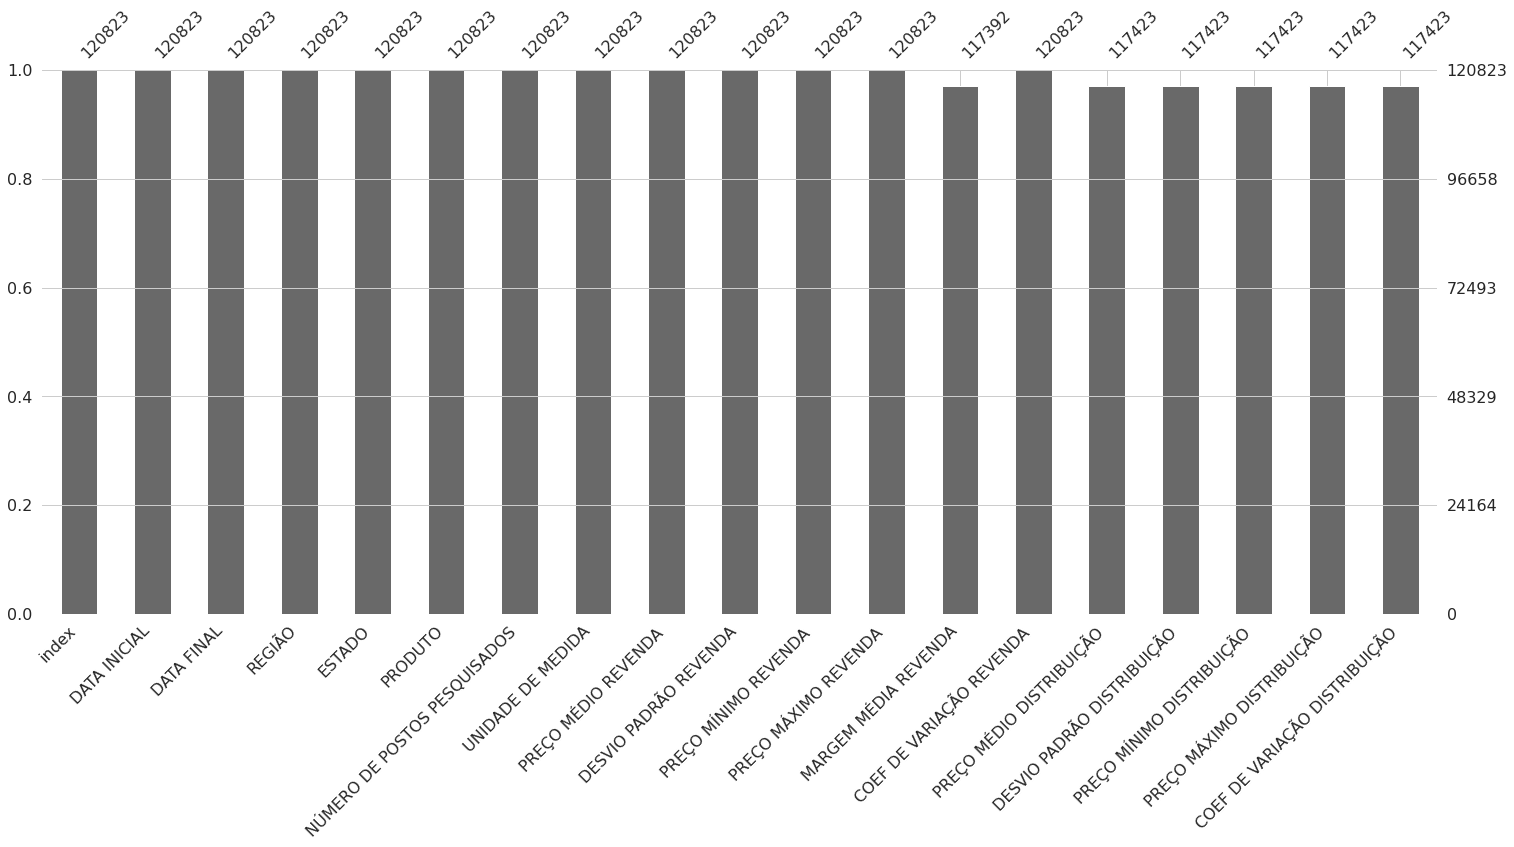

In [74]:
# Investigando dados faltantes
import missingno as msno
msno.bar((df))
plt.show()

In [75]:
df.isnull().mean()*100

index                            0.000000
DATA INICIAL                     0.000000
DATA FINAL                       0.000000
REGIÃO                           0.000000
ESTADO                           0.000000
PRODUTO                          0.000000
NÚMERO DE POSTOS PESQUISADOS     0.000000
UNIDADE DE MEDIDA                0.000000
PREÇO MÉDIO REVENDA              0.000000
DESVIO PADRÃO REVENDA            0.000000
PREÇO MÍNIMO REVENDA             0.000000
PREÇO MÁXIMO REVENDA             0.000000
MARGEM MÉDIA REVENDA             2.839691
COEF DE VARIAÇÃO REVENDA         0.000000
PREÇO MÉDIO DISTRIBUIÇÃO         2.814034
DESVIO PADRÃO DISTRIBUIÇÃO       2.814034
PREÇO MÍNIMO DISTRIBUIÇÃO        2.814034
PREÇO MÁXIMO DISTRIBUIÇÃO        2.814034
COEF DE VARIAÇÃO DISTRIBUIÇÃO    2.814034
dtype: float64

# Preenchendo dados faltantes com a mediana 

In [76]:
coef_mediana = df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].median()
print(coef_mediana)

0.028999999999999998


In [77]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].fillna(coef_mediana, inplace=True)

In [78]:
preco_maximo_dist_mediana = df['PREÇO MÁXIMO DISTRIBUIÇÃO'].median()
df['PREÇO MÁXIMO DISTRIBUIÇÃO'].fillna(preco_maximo_dist_mediana, inplace=True)

In [79]:
preco_min_dist_mediana = df['PREÇO MÍNIMO DISTRIBUIÇÃO'].median()
df['PREÇO MÍNIMO DISTRIBUIÇÃO'].fillna(preco_min_dist_mediana, inplace=True)

In [80]:
desvio_padrao_dist_mediana = df['DESVIO PADRÃO DISTRIBUIÇÃO'].median()
df['DESVIO PADRÃO DISTRIBUIÇÃO'].fillna(desvio_padrao_dist_mediana, inplace=True)

In [81]:
preco_medio_dist_mediana = df['PREÇO MÉDIO DISTRIBUIÇÃO'].median()
df['PREÇO MÉDIO DISTRIBUIÇÃO'].fillna(preco_medio_dist_mediana, inplace=True)

In [82]:
margem_media_rev_mediana = df['MARGEM MÉDIA REVENDA'].median()
df['MARGEM MÉDIA REVENDA'].fillna(margem_media_rev_mediana, inplace=True)

In [83]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].isnull().sum()

0

In [84]:
df.isnull().sum()

index                            0
DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

# EDA

In [85]:
# Variavel de interesse
target = 'PREÇO MÉDIO REVENDA'
print('target:', target)

# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')


target: PREÇO MÉDIO REVENDA
numerical vars(11): ['index', 'NÚMERO DE POSTOS PESQUISADOS', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA', 'COEF DE VARIAÇÃO REVENDA', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']
categorical vars(7): ['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO', 'UNIDADE DE MEDIDA', 'PREÇO MÉDIO DISTRIBUIÇÃO']


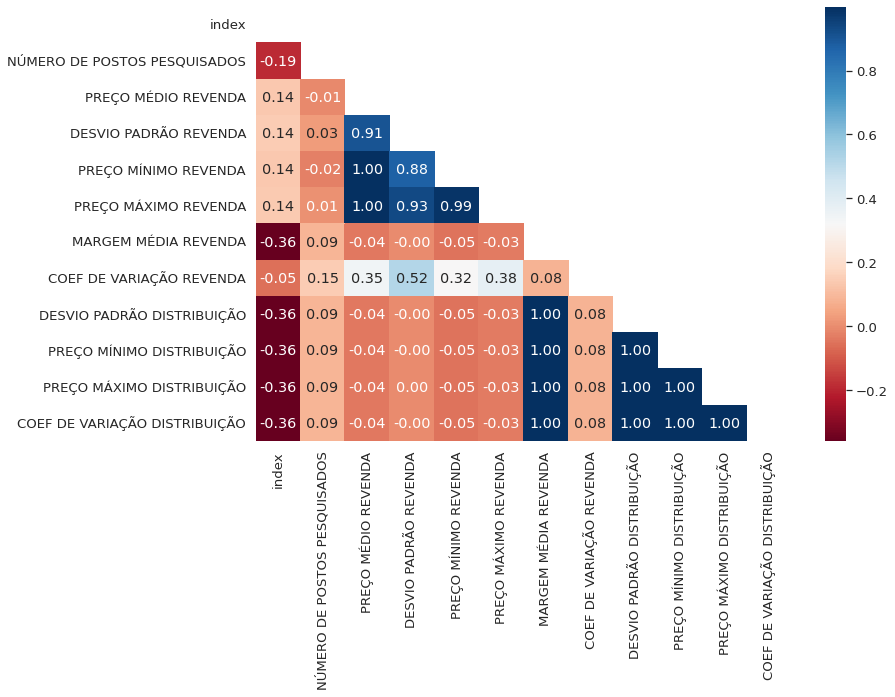

In [86]:
# Matriz de correlação
sns.set_context(font_scale = 5.0)
plt.figure(figsize = (12,8))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(df.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

In [87]:
# Sumário estatístico
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,index,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
count,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00,120823.00
mean,60411.00,221.07,11.47,0.68,9.98,13.23,-4563.97,0.05,-4558.15,-4551.45,-4549.17,-4558.65
std,34878.74,387.94,19.16,1.40,16.43,22.45,20875.42,0.02,20858.84,20860.31,20860.81,20858.73
min,0.00,1.00,0.77,0.00,0.59,1.00,-99999.00,0.00,-99999.00,-99999.00,-99999.00,-99999.00
25%,30205.50,39.00,2.16,0.08,1.99,2.42,0.28,0.03,0.04,1.65,1.92,0.02
50%,60411.00,99.00,2.90,0.12,2.69,3.20,0.38,0.04,0.08,2.24,2.54,0.03
75%,90616.50,226.00,4.03,0.20,3.79,4.59,0.54,0.06,0.14,3.16,3.54,0.06
95%,114780.90,843.00,58.05,3.98,48.00,69.00,13.22,0.09,3.35,34.90,47.00,0.12
99%,119613.78,2360.00,78.07,6.41,69.99,91.00,19.88,0.12,5.84,50.00,69.42,0.19
max,120822.00,4167.00,107.50,10.75,100.00,120.00,36.85,0.40,18.39,83.00,94.50,0.78


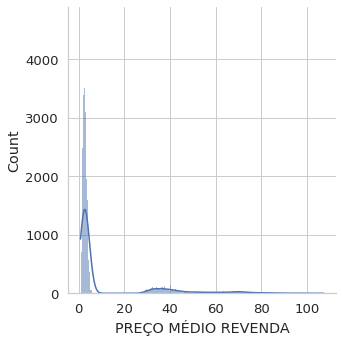

In [48]:
sns.displot(df, x="PREÇO MÉDIO REVENDA", kde=True)

In [49]:
df['LOGPREÇO MÉDIO REVENDA'] = np.log(df['PREÇO MÉDIO REVENDA'].values)


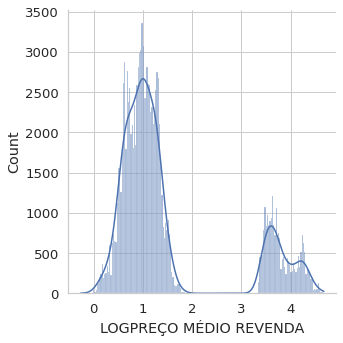

In [50]:
sns.displot(df, x="LOGPREÇO MÉDIO REVENDA", kde=True)

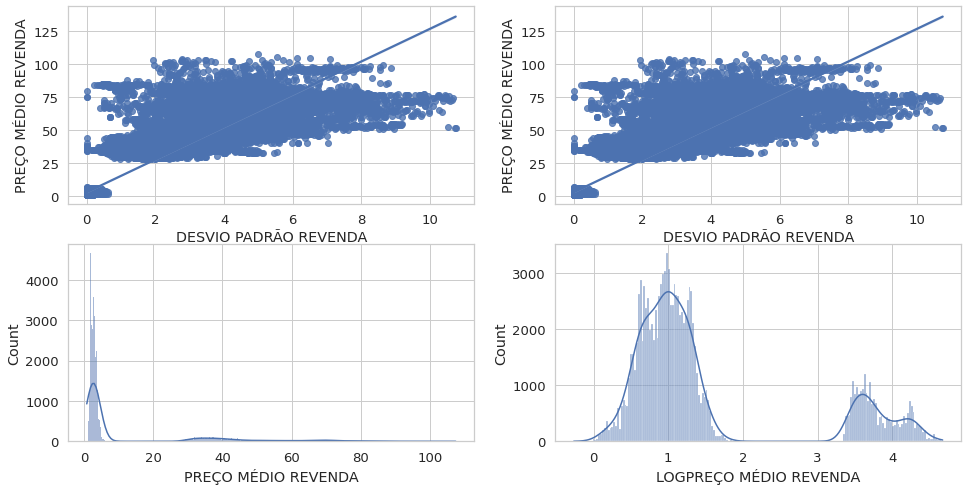

In [51]:
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)

sns.histplot(x=df['PREÇO MÉDIO REVENDA'], kde=True, ax=axs[1][0])
sns.histplot(x=df['LOGPREÇO MÉDIO REVENDA'], kde=True, ax=axs[1][1])

sns.regplot(x='DESVIO PADRÃO REVENDA', y='PREÇO MÉDIO REVENDA', data=df, ax=axs[0][0])
sns.regplot(x='DESVIO PADRÃO REVENDA', y='PREÇO MÉDIO REVENDA', data=df, ax=axs[0][1])

plt.show()

In [54]:
df_novo = pd.read_csv('2004-2021.tsv',sep='\t', encoding='utf-8', parse_dates=['DATA INICIAL', 'DATA FINAL']).reset_index()

<AxesSubplot:xlabel='DATA INICIAL', ylabel='PREÇO MÉDIO REVENDA'>

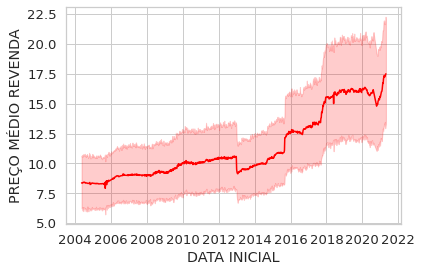

In [88]:
sns.lineplot(data=df, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

<AxesSubplot:xlabel='DATA INICIAL', ylabel='PREÇO MÉDIO REVENDA'>

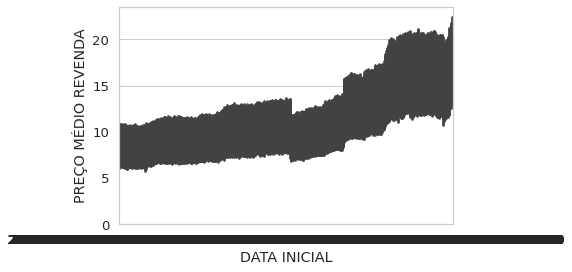

In [90]:
sns.barplot(data=df, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

In [96]:
df['PREÇO MÉDIO REVENDA']

0         1.288
1         1.162
2         1.389
3         1.262
4         1.181
          ...  
120818    4.582
120819    4.141
120820    4.246
120821    4.464
120822    4.352
Name: PREÇO MÉDIO REVENDA, Length: 120823, dtype: float64

In [98]:
px.line(
    df.query('ESTADO == "SAO PAULO" and PRODUTO != "GLP"'),
    x='DATA INICIAL',
    y='PREÇO MÉDIO REVENDA',
    color='PRODUTO',
    labels={'DATA INICIAL':'Data', 'PREÇO MÉDIO REVENDA':'Preço médio de revenda'},
    title='Preços médios de revenda para vários combustíveis entre 2004 e 2021'
)

In [100]:
fig = go.Figure() # Inicializando uma figura

fig.add_trace(go.Scatter(
    x=df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')['DATA INICIAL'],
    y=df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')['PREÇO MÉDIO REVENDA'],
    mode='lines',
    name='São Paulo',
    line=dict(color='red', width=2, dash='dash')
))

fig.add_trace(go.Scatter(
    x=df.query('ESTADO == "RIO DE JANEIRO" and PRODUTO == "GASOLINA COMUM"')['DATA INICIAL'],
    y=df.query('ESTADO == "RIO DE JANEIRO" and PRODUTO == "GASOLINA COMUM"')['PREÇO MÉDIO REVENDA'],
    mode='lines',
    name='Rio de Janeiro',
    line=dict(color='green', width=2, dash='dashdot')
))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        linecolor='rgb(150, 150, 150)',
        linewidth=3,
        tickfont=dict(
            family='Arial',
            size=14,
        )
    ),
    
    yaxis=dict(
        showline=True,
        showticklabels=True,
        gridcolor='rgb(200, 200, 200)',
        linecolor='rgb(150, 150, 150)',
        linewidth=3,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=14,
        )
    ),
    
    plot_bgcolor='white',
    title='Preço da gasolina em SP e RJ'
)

fig

In [55]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          120823 non-null  int64         
 1   DATA INICIAL                   120823 non-null  datetime64[ns]
 2   DATA FINAL                     120823 non-null  datetime64[ns]
 3   REGIÃO                         120823 non-null  object        
 4   ESTADO                         120823 non-null  object        
 5   PRODUTO                        120823 non-null  object        
 6   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 7   UNIDADE DE MEDIDA              120823 non-null  object        
 8   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 9   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 10  PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 11  

In [ ]:
sns.lineplot(data=df, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

In [ ]:
print('Cardinalidade médias das categóricas:', np.mean(df[cat_vars].nunique()))
df[cat_vars].nunique().sort_values(ascending=False)

In [ ]:
def calc_vif(df):
  """ 
    Variable Inflation Factors
    VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
    Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Fixing%20Multicollinearity-,What%20is%20Multicollinearity%3F,variable%20in%20a%20regression%20model.
  """
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [(df.values, i) for i in range(df.shape[1])]

  return(vif)

#Função para plotar o VIF
def plot_vif(vif):
  print('vars: ', list(vif.columns))
  print('Variable Inflation Factors:', vif.VIF.sum(), '\n')


In [ ]:
lr_vars = ['DESVIO PADRÃO REVENDA', 'DESVIO PADRÃO REVENDA']
plot_vif(calc_vif(df[lr_vars]))


In [ ]:
# Calculando o VIF das melhores features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['LOGPREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA','PREÇO MÁXIMO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO REVENDA']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

In [ ]:
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

In [105]:
from sklearn.preprocessing import OneHotEncoder

def encode(df):
    cat_values = df[cat_vars]
    
    encoder = OneHotEncoder()
    encoder.fit(df[cat_values])
    columns = [cat_values[0] + '_' + cat_name for cat_name in encoder.categories_][0]
    encoded = pd.DataFrame(encoder.transform(df[cat_values]).toarray(), columns=columns)
    return pd.concat([df, encoded.astype(int)], axis=1).drop('cat_vars', axis=1)


df = encode(df)
df

ValueError: Boolean array expected for the condition, not datetime64[ns]

In [103]:
from sklearn.preprocessing import StandardScaler

def scale(df):

    scaler = StandardScaler()
    scaler.fit(df[num_vars])
    df[num_values] = scaler.transform(df[num_vars])
    return df


df = scale(df)
df.sample(5)

NameError: name 'num_values' is not defined